# 1) Ingest the data into a format that is easy for analysis.

# 2) Perform Exploratory Data Analysis on the dataset.

# 3) Perform classification on the dataset to detect fraud ( logistic regression, naive bayes classifier etc).


In [78]:
# your code starts here..
# Import libraries
%matplotlib inline


import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
sns.set()
sns.set_style("whitegrid")
fraud_data = pd.read_csv("https://raw.githubusercontent.com/hariharan9666/data/master/Fraud/fraud_data.csv")
fraud_data.head()



,S,A,F,J,G
0,0,2,1,0,1
1,0,0,1,0,1
2,0,2,1,0,1
3,0,1,1,0,1
4,0,2,0,1,1


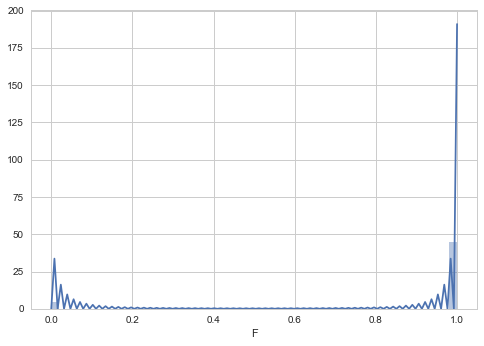

In [83]:
sns.distplot(fraud_data['F'])

#  fraud occurrence

S 1.0
A 1.0
F 1.0
J 1.0
G 1.0


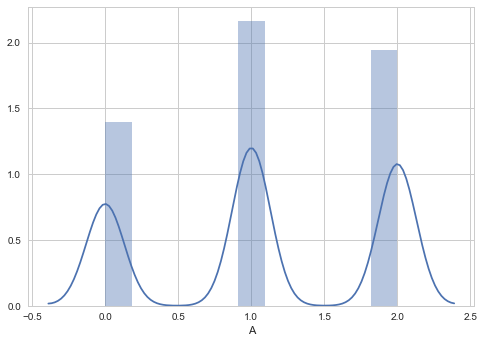

In [80]:
raw_features = fraud_data.columns

for feature in raw_features:
    content_prop = len(fraud_data[fraud_data[feature].notnull() == True].index)/len(fraud_data.index)
    print(feature, content_prop)
    
sns.distplot(fraud_data[fraud_data['A'].notnull()].A)
    

# define functions to categorize the age into three categories 

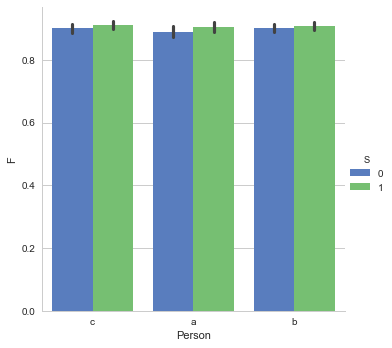

In [81]:
def Person_type(x):
  if x ==0:
    return 'a'
  elif x == 1:
    return 'b'
  elif x == 2:
    return 'c'
  else:
    return 'd'
fraud_data['Person'] = fraud_data['A'].apply(Person_type)
g = sns.factorplot(x="Person", y="F", hue="S", data=fraud_data,
                             size=5, kind="bar", palette="muted")


# Chances of frauds

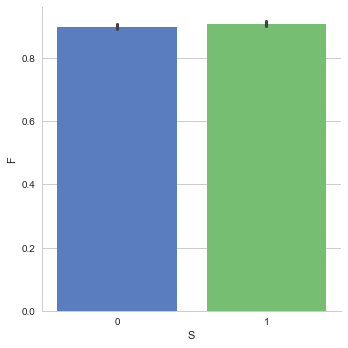

In [82]:
g = sns.factorplot(x="S", y="F", data=fraud_data, size=5,
                   kind="bar", palette="muted")

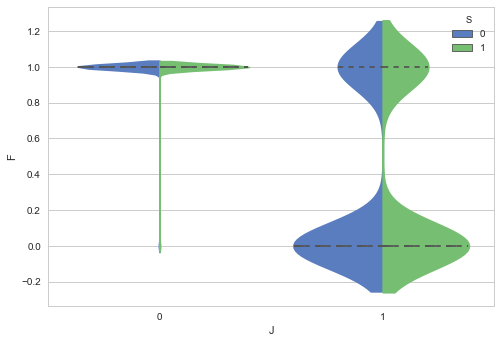

In [68]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="J", y="F", hue="S", data=fraud_data, split=True,
               inner="quart", palette="muted")

# Tabulating the data


,S,A,F,J,G
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.504200,1.099400,0.902600,0.137600,0.971000
std,0.500007,0.772515,0.296516,0.344497,0.167815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000


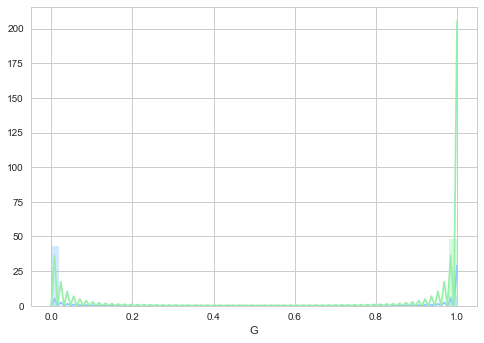

In [69]:
sns.distplot(fraud_data['J'])
sns.distplot(fraud_data['G'])

fraud_data.describe()

# Data Analysis


In [70]:
try:
    fraud_A = pd.get_dummies(fraud_data['A'])
    fraud_S = pd.get_dummies(fraud_data['S'])
    fraud_data = fraud_data.join([fraud_A, fraud_S])
except:
    print("The columns already have the appropriate features.")

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
log_sci_model = LogisticRegression()
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression
features = ['F', 'S', 'A','J','G']
log_sci_model = sm.Logit(fraud_data['F'], fraud_data[features]).fit()
y_pred = log_sci_model.predict(fraud_data[features])
roc_frauds = roc_curve(fraud_data[['F']], y_pred)    

The columns already have the appropriate features.
         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.5/dist-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.5/dist-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix